# Setup

In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

## Training Data 

In [233]:
# offensive data df
offense_filename = './data_files/2013-19_players_assorted_stats.csv'
offensive_df = pd.read_csv(offense_filename)
offensive_df.head(n=10)

,Unnamed: 0,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,PCT_UAST_2PM,PCT_AST_3PM,PCT_UAST_3PM,PCT_AST_FGM,PCT_UAST_FGM
0,0,201985,AJ Price,1610612750,MIN,27.0,28,15,13,0.536,...,0.114,0.000,0.114,0.182,0.231,0.769,0.833,0.167,0.421,0.579
1,1,201166,Aaron Brooks,1610612743,DEN,29.0,72,42,30,0.583,...,0.109,0.129,0.138,0.326,0.139,0.861,0.698,0.302,0.369,0.631
2,2,201189,Aaron Gray,1610612758,SAC,29.0,37,12,25,0.324,...,0.031,0.169,0.108,0.738,0.667,0.333,0.000,0.000,0.667,0.333
3,3,203519,Adonis Thomas,1610612755,PHI,21.0,6,2,4,0.333,...,0.429,0.071,0.357,0.429,0.200,0.800,1.000,0.000,0.333,0.667
4,4,1733,Al Harrington,1610612764,WAS,34.0,34,20,14,0.588,...,0.098,0.120,0.164,0.373,0.646,0.354,1.000,0.000,0.793,0.207
5,5,201143,Al Horford,1610612737,ATL,28.0,29,16,13,0.552,...,0.112,0.108,0.158,0.543,0.709,0.291,1.000,0.000,0.714,0.286
6,6,2744,Al Jefferson,1610612766,CHA,29.0,73,38,35,0.521,...,0.017,0.120,0.140,0.617,0.611,0.389,1.000,0.000,0.613,0.387
7,7,202329,Al-Farouq Aminu,1610612740,NOP,23.0,80,33,47,0.413,...,0.199,0.159,0.191,0.622,0.674,0.326,1.000,0.000,0.692,0.308
8,8,101187,Alan Anderson,1610612751,BKN,31.0,78,43,35,0.551,...,0.115,0.163,0.154,0.255,0.436,0.564,0.893,0.107,0.634,0.366
9,9,202692,Alec Burks,1610612762,UTA,22.0,78,24,54,0.308,...,0.164,0.256,0.155,0.455,0.327,0.673,0.820,0.180,0.392,0.608


In [234]:
# defensive data df
defensive_filename = './data_files/2013-19_shot_defenses.csv'
defensive_df = pd.read_csv(defensive_filename)
defensive_df.head()

,Unnamed: 0,CLOSE_DEF_PERSON_ID,PLAYER_NAME,PLAYER_LAST_TEAM_ID,PLAYER_LAST_TEAM_ABBREVIATION,PLAYER_POSITION,AGE,GP,G,6FT_FREQ,...,LT_06_PCT,NS_LT_06_PCT,6FT_PLUSMINUS,season,3P_FREQ,FG3M,FG3A,FG3_PCT,NS_FG3_PCT,3P_PLUSMINUS
0,0,201577,Robin Lopez,1610612757,POR,C,26.0,82,82,0.488,...,0.467,0.594,-0.127,2013-14,0.068,0.34,1.10,0.311,0.342,-0.031
1,1,201586,Serge Ibaka,1610612760,OKC,F-C,24.0,81,81,0.489,...,0.488,0.599,-0.111,2013-14,0.154,0.93,2.42,0.383,0.358,0.024
2,2,2200,Pau Gasol,1610612747,LAL,C-F,33.0,60,60,0.518,...,0.598,0.603,-0.005,2013-14,0.069,0.32,1.02,0.311,0.364,-0.052
3,3,201599,DeAndre Jordan,1610612746,LAC,C,25.0,81,81,0.452,...,0.560,0.601,-0.040,2013-14,0.086,0.48,1.43,0.336,0.360,-0.024
4,4,101162,Marcin Gortat,1610612764,WAS,C,30.0,80,79,0.494,...,0.540,0.597,-0.057,2013-14,0.083,0.45,1.28,0.353,0.362,-0.010


## Current season data

# Data Filtration

In [235]:
offensive_df.columns

Index(['Unnamed: 0', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN',
       'E_OFF_RATING', 'OFF_RATING', 'sp_work_OFF_RATING', 'E_DEF_RATING',
       'DEF_RATING', 'sp_work_DEF_RATING', 'E_NET_RATING', 'NET_RATING',
       'sp_work_NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT',
       'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'E_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'USG_PCT', 'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'sp_work_PACE',
       'PIE', 'POSS', 'FGM', 'FGA', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'E_OFF_RATING_RANK',
       'OFF_RATING_RANK', 'sp_work_OFF_RATING_RANK', 'E_DEF_RATING_RANK',
       'DEF_RATING_RANK', 'sp_work_DEF_RATING_RANK', 'E_NET_RATING_RANK',
       'NET_RATING_RANK', 'sp_work_NET_RATING_RANK', 'AST_PCT_RANK',
       'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK',
       'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'E_TOV_PC

In [236]:
# Remove irrelevant statistics
# Remove all ratings and rankings

keep_cols = ['PLAYER_ID', 'PLAYER_NAME', 'AGE', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 
                'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'E_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT', 
                'E_USG_PCT', 'E_PACE', 'PACE', 'PTS_FB', 'PTS_PAINT', 'PFD', 'BLKA', 'PCT_FGA_2PT',
                'PCT_FGA_3PT', 'PCT_PTS_2PT', 'PCT_PTS_2PT_MR', 'PCT_PTS_3PT',
                'PCT_PTS_FB', 'PCT_PTS_FT', 'PCT_PTS_OFF_TOV', 'PCT_PTS_PAINT',
                'PCT_AST_2PM', 'PCT_UAST_2PM', 'PCT_AST_3PM', 'PCT_UAST_3PM', 'PCT_AST_FGM', 'PCT_UAST_FGM']

filtered_off_df = offensive_df[keep_cols].copy()

In [237]:
filtered_off_df.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'AGE', 'AST_PCT', 'AST_TO', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'E_TOV_PCT', 'EFG_PCT',
       'TS_PCT', 'USG_PCT', 'E_USG_PCT', 'E_PACE', 'PACE', 'PTS_FB',
       'PTS_PAINT', 'PFD', 'BLKA', 'PCT_FGA_2PT', 'PCT_FGA_3PT', 'PCT_PTS_2PT',
       'PCT_PTS_2PT_MR', 'PCT_PTS_3PT', 'PCT_PTS_FB', 'PCT_PTS_FT',
       'PCT_PTS_OFF_TOV', 'PCT_PTS_PAINT', 'PCT_AST_2PM', 'PCT_UAST_2PM',
       'PCT_AST_3PM', 'PCT_UAST_3PM', 'PCT_AST_FGM', 'PCT_UAST_FGM'],
      dtype='object')

In [238]:
defensive_df.columns

Index(['Unnamed: 0', 'CLOSE_DEF_PERSON_ID', 'PLAYER_NAME',
       'PLAYER_LAST_TEAM_ID', 'PLAYER_LAST_TEAM_ABBREVIATION',
       'PLAYER_POSITION', 'AGE', 'GP', 'G', '6FT_FREQ', 'FGM_LT_06',
       'FGA_LT_06', 'LT_06_PCT', 'NS_LT_06_PCT', '6FT_PLUSMINUS', 'season',
       '3P_FREQ', 'FG3M', 'FG3A', 'FG3_PCT', 'NS_FG3_PCT', '3P_PLUSMINUS'],
      dtype='object')

# Collinearity Analysis

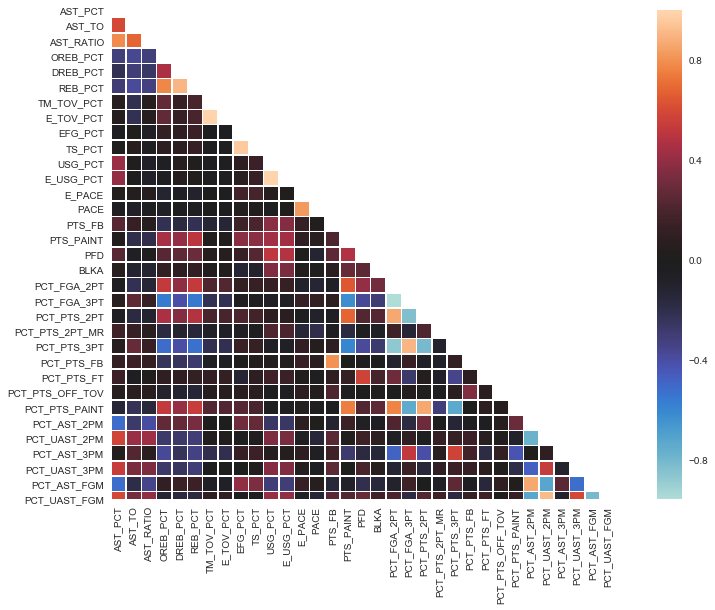

In [239]:
# Look at correlation matrices
off_corr = filtered_off_df[filtered_off_df.columns[3:]].corr()
off_mask = np.triu(np.ones_like(off_corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(15, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(off_corr, mask=off_mask, square=True, center=0, linewidths=0.5)

Most of these look fine. The ones you'd expect to go together actually go together just fine. I don't see any great sense in removing any columns yet.

In [240]:
 defensive_df[defensive_df.columns[9:22]]

,6FT_FREQ,FGM_LT_06,FGA_LT_06,LT_06_PCT,NS_LT_06_PCT,6FT_PLUSMINUS,season,3P_FREQ,FG3M,FG3A,FG3_PCT,NS_FG3_PCT,3P_PLUSMINUS
0,0.488,3.66,7.83,0.467,0.594,-0.127,2013-14,0.068,0.34,1.10,0.311,0.342,-0.031
1,0.489,3.74,7.67,0.488,0.599,-0.111,2013-14,0.154,0.93,2.42,0.383,0.358,0.024
2,0.518,4.53,7.58,0.598,0.603,-0.005,2013-14,0.069,0.32,1.02,0.311,0.364,-0.052
3,0.452,4.23,7.56,0.560,0.601,-0.040,2013-14,0.086,0.48,1.43,0.336,0.360,-0.024
4,0.494,4.08,7.55,0.540,0.597,-0.057,2013-14,0.083,0.45,1.28,0.353,0.362,-0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,0.200,0.29,0.43,0.667,0.626,0.041,2018-19,0.333,0.14,0.71,0.200,0.307,-0.107
2929,0.154,0.20,0.40,0.500,0.595,-0.095,2018-19,0.615,0.20,1.60,0.125,0.254,-0.129
2930,0.143,0.25,0.25,1.000,0.524,0.476,2018-19,0.286,0.00,0.50,0.000,0.296,-0.296
2931,0.188,0.25,0.25,1.000,0.593,0.407,2018-19,0.375,0.17,0.50,0.333,0.374,-0.040


In [241]:
# correlation matrix with defensive statistics

filtered_def_stats = pd.concat([defensive_df.PLAYER_NAME, defensive_df[defensive_df.columns[9:22]]], axis=1)

In [242]:
filtered_def_stats

,PLAYER_NAME,6FT_FREQ,FGM_LT_06,FGA_LT_06,LT_06_PCT,NS_LT_06_PCT,6FT_PLUSMINUS,season,3P_FREQ,FG3M,FG3A,FG3_PCT,NS_FG3_PCT,3P_PLUSMINUS
0,Robin Lopez,0.488,3.66,7.83,0.467,0.594,-0.127,2013-14,0.068,0.34,1.10,0.311,0.342,-0.031
1,Serge Ibaka,0.489,3.74,7.67,0.488,0.599,-0.111,2013-14,0.154,0.93,2.42,0.383,0.358,0.024
2,Pau Gasol,0.518,4.53,7.58,0.598,0.603,-0.005,2013-14,0.069,0.32,1.02,0.311,0.364,-0.052
3,DeAndre Jordan,0.452,4.23,7.56,0.560,0.601,-0.040,2013-14,0.086,0.48,1.43,0.336,0.360,-0.024
4,Marcin Gortat,0.494,4.08,7.55,0.540,0.597,-0.057,2013-14,0.083,0.45,1.28,0.353,0.362,-0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,Thomas Welsh,0.200,0.29,0.43,0.667,0.626,0.041,2018-19,0.333,0.14,0.71,0.200,0.307,-0.107
2929,Chris Chiozza,0.154,0.20,0.40,0.500,0.595,-0.095,2018-19,0.615,0.20,1.60,0.125,0.254,-0.129
2930,Troy Caupain,0.143,0.25,0.25,1.000,0.524,0.476,2018-19,0.286,0.00,0.50,0.000,0.296,-0.296
2931,Brandon Goodwin,0.188,0.25,0.25,1.000,0.593,0.407,2018-19,0.375,0.17,0.50,0.333,0.374,-0.040


In [243]:
filtered_def_stats[filtered_def_stats.columns[1:14]].corr()

,6FT_FREQ,FGM_LT_06,FGA_LT_06,LT_06_PCT,NS_LT_06_PCT,6FT_PLUSMINUS,3P_FREQ,FG3M,FG3A,FG3_PCT,NS_FG3_PCT,3P_PLUSMINUS
6FT_FREQ,1.000000,0.586550,0.639542,-0.326541,0.114886,-0.353022,-0.765049,-0.426112,-0.444749,0.005339,-0.145153,0.031588
FGM_LT_06,0.586550,1.000000,0.968758,-0.117603,0.223644,-0.164626,-0.503497,0.205478,0.238646,-0.028096,0.064751,-0.039806
FGA_LT_06,0.639542,0.968758,1.000000,-0.301276,0.177416,-0.340401,-0.574537,0.134075,0.153797,-0.014996,0.044955,-0.023075
LT_06_PCT,-0.326541,-0.117603,-0.301276,1.000000,0.144138,0.979148,0.308813,0.113095,0.128886,-0.032232,0.027781,-0.037440
NS_LT_06_PCT,0.114886,0.223644,0.177416,0.144138,1.000000,-0.059851,0.073278,0.211360,0.211326,0.052936,0.057458,0.042443
6FT_PLUSMINUS,-0.353022,-0.164626,-0.340401,0.979148,-0.059851,1.000000,0.296531,0.070677,0.086599,-0.043307,0.016353,-0.046429
3P_FREQ,-0.765049,-0.503497,-0.574537,0.308813,0.073278,0.296531,1.000000,0.519663,0.554442,-0.008006,0.124868,-0.030730
FG3M,-0.426112,0.205478,0.134075,0.113095,0.211360,0.070677,0.519663,1.000000,0.936634,0.255791,0.269016,0.207920
FG3A,-0.444749,0.238646,0.153797,0.128886,0.211326,0.086599,0.554442,0.936634,1.000000,-0.010106,0.243123,-0.054062
FG3_PCT,0.005339,-0.028096,-0.014996,-0.032232,0.052936,-0.043307,-0.008006,0.255791,-0.010106,1.000000,0.106014,0.983787


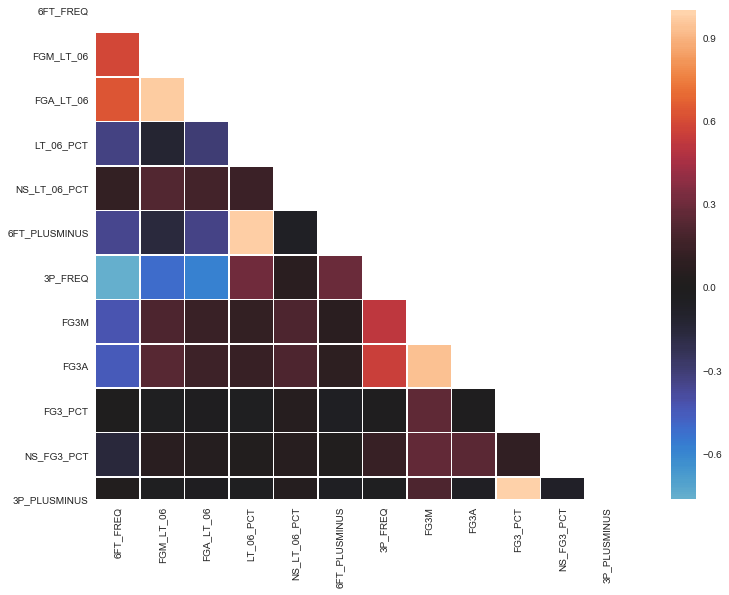

In [244]:
# Look at correlation matrices
def_corr = filtered_def_stats[filtered_def_stats.columns[1:14]].corr()
def_mask = np.triu(np.ones_like(def_corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(15, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(def_corr, square=True, mask=def_mask, center=0, linewidths=0.5)

In [245]:
filtered_def_stats.columns

Index(['PLAYER_NAME', '6FT_FREQ', 'FGM_LT_06', 'FGA_LT_06', 'LT_06_PCT',
       'NS_LT_06_PCT', '6FT_PLUSMINUS', 'season', '3P_FREQ', 'FG3M', 'FG3A',
       'FG3_PCT', 'NS_FG3_PCT', '3P_PLUSMINUS'],
      dtype='object')

Conclusion: Remove +/- in favor of percentage

In [246]:
def_keep_cols = ['PLAYER_NAME', '6FT_FREQ', 'FGM_LT_06', 'FGA_LT_06', 'LT_06_PCT',
                    'NS_LT_06_PCT', '3P_FREQ', 'FG3M', 'FG3A', 'FG3_PCT', 'NS_FG3_PCT']

filtered_def_df = filtered_def_stats[def_keep_cols]

In [247]:
filtered_def_df.head()

,PLAYER_NAME,6FT_FREQ,FGM_LT_06,FGA_LT_06,LT_06_PCT,NS_LT_06_PCT,3P_FREQ,FG3M,FG3A,FG3_PCT,NS_FG3_PCT
0,Robin Lopez,0.488,3.66,7.83,0.467,0.594,0.068,0.34,1.10,0.311,0.342
1,Serge Ibaka,0.489,3.74,7.67,0.488,0.599,0.154,0.93,2.42,0.383,0.358
2,Pau Gasol,0.518,4.53,7.58,0.598,0.603,0.069,0.32,1.02,0.311,0.364
3,DeAndre Jordan,0.452,4.23,7.56,0.560,0.601,0.086,0.48,1.43,0.336,0.360
4,Marcin Gortat,0.494,4.08,7.55,0.540,0.597,0.083,0.45,1.28,0.353,0.362


# Scaling statistics

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C972057848>,
      dtype=object)

<Figure size 1800x1800 with 0 Axes>

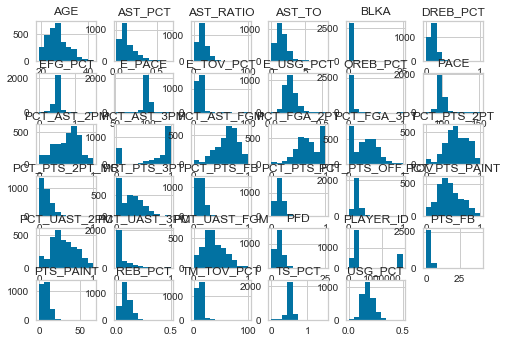

In [248]:
plt.figure(figsize=(25,25))
filtered_off_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C975235848>,
      dtype=object)

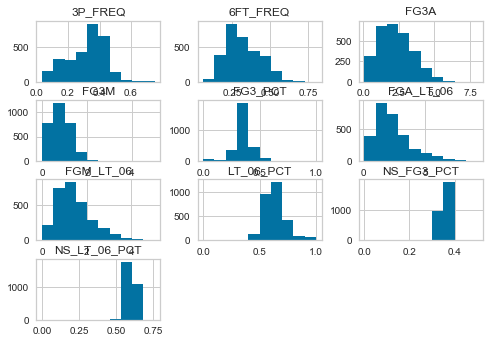

In [249]:
filtered_def_df.hist()

None of these things are normally distributed, so normalization may not go very well. 

In [250]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

minmax = MinMaxScaler()
maxabs = MaxAbsScaler()

In [251]:
# State values to cluster
X_off = filtered_off_df[filtered_off_df.columns[3:]]
X_def = filtered_def_df[filtered_def_df.columns[1:]]

In [252]:
# scale both offensive and defensive 
scaled_X_off = minmax.fit_transform(X_off)
scaled_X_def = minmax.fit_transform(X_def)

In [253]:
scaled_X_off[0].reshape(-1,1).T

array([[0.40629685, 0.2325    , 0.197     , 0.008     , 0.075     ,
        0.08      , 0.106     , 0.105     , 0.31866667, 0.31266667,
        0.426     , 0.43233083, 0.53851843, 0.31945412, 0.06      ,
        0.05697151, 0.056     , 0.        , 0.522     , 0.478     ,
        0.591     , 0.409     , 0.409     , 0.114     , 0.        ,
        0.114     , 0.182     , 0.231     , 0.769     , 0.833     ,
        0.167     , 0.421     , 0.579     ]])

# Setup Clustering Packages

In [254]:
from sklearn.cluster import OPTICS
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer

# Offensive Players

In [255]:
len(offensive_df)

3006

In [256]:
len(defensive_df)

2933

In [257]:
meanshift = MeanShift(min_bin_freq=500, cluster_all=False)
optics = OPTICS(min_samples=500)
kmeans = KMeans(n_clusters=12)

In [258]:
ms_off = meanshift.fit(scaled_X_off)
op_off = optics.fit(scaled_X_off)
kmeans_off = kmeans.fit(scaled_X_off)

In [259]:
scaled_X_off[24].reshape(-1,1).T

array([[0.1964018 , 0.16625   , 0.211     , 0.068     , 0.116     ,
        0.184     , 0.158     , 0.16      , 0.344     , 0.35466667,
        0.284     , 0.27067669, 0.50228029, 0.20568166, 0.04      ,
        0.13793103, 0.236     , 0.04      , 0.969     , 0.031     ,
        0.717     , 0.035     , 0.013     , 0.115     , 0.27      ,
        0.212     , 0.681     , 0.691     , 0.309     , 1.        ,
        0.        , 0.695     , 0.305     ]])

In [ ]:
kmeans_def.predict(scaled_X_def[25].reshape(-1,1).T)

In [ ]:
len(scaled_X_off[0])

In [ ]:
len(ms_off.cluster_centers_)

# Defensive Players

In [270]:
cluster = KMeans()

In [271]:
ms_def = meanshift.fit(scaled_X_def)
op_def = optics.fit(scaled_X_def)
kmeans_def = kmeans.fit(scaled_X_def)

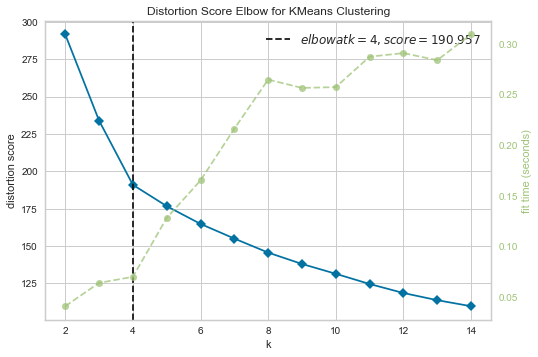

In [272]:
vis = KElbowVisualizer(
    cluster, k=(2,15), metric='distortion'
)
vis.fit(scaled_X_def)
vis.show()

In [273]:
kmeans_def = KMeans(n_clusters=4)
def_clusters = kmeans_def.fit(scaled_X_def)

In [274]:
list(def_clusters.cluster_centers_)

[array([0.28692533, 0.3275925 , 0.26907414, 0.65175758, 0.7980433 ,
        0.48744477, 0.2574119 , 0.44530778, 0.35729405, 0.71405387]),
 array([0.5365965 , 0.58930985, 0.56569076, 0.56858151, 0.79579011,
        0.19172409, 0.14203893, 0.24517447, 0.35482482, 0.70378589]),
 array([0.50622282, 0.27779474, 0.25345731, 0.58931795, 0.78755061,
        0.22352041, 0.0790735 , 0.13067115, 0.36101026, 0.69064957]),
 array([0.2502961 , 0.15564205, 0.11998613, 0.65857075, 0.78447092,
        0.4962909 , 0.13577247, 0.23257519, 0.35395602, 0.70344742])]

In [275]:
list(X_def.columns)

['6FT_FREQ',
 'FGM_LT_06',
 'FGA_LT_06',
 'LT_06_PCT',
 'NS_LT_06_PCT',
 '3P_FREQ',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'NS_FG3_PCT']

In [282]:
list(zip(X_def.columns, def_clusters.cluster_centers_[0]))

[('6FT_FREQ', 0.28692533370895934),
 ('FGM_LT_06', 0.32759250351842945),
 ('FGA_LT_06', 0.2690741357408023),
 ('LT_06_PCT', 0.6517575757575758),
 ('NS_LT_06_PCT', 0.798043298481895),
 ('3P_FREQ', 0.48744476623264515),
 ('FG3M', 0.25741189674523024),
 ('FG3A', 0.4453077786411117),
 ('FG3_PCT', 0.357294051627385),
 ('NS_FG3_PCT', 0.714053872053872)]

In [283]:
clusters_dict = dict()

for i in range(len(list(def_clusters.cluster_centers_))):
    clusters_dict[i] = list(zip(X_def.columns, def_clusters.cluster_centers_[i]))

In [284]:
clusters_dict

{0: [('6FT_FREQ', 0.28692533370895934),
  ('FGM_LT_06', 0.32759250351842945),
  ('FGA_LT_06', 0.2690741357408023),
  ('LT_06_PCT', 0.6517575757575758),
  ('NS_LT_06_PCT', 0.798043298481895),
  ('3P_FREQ', 0.48744476623264515),
  ('FG3M', 0.25741189674523024),
  ('FG3A', 0.4453077786411117),
  ('FG3_PCT', 0.357294051627385),
  ('NS_FG3_PCT', 0.714053872053872)],
 1: [('6FT_FREQ', 0.5365964977951149),
  ('FGM_LT_06', 0.5893098520835748),
  ('FGA_LT_06', 0.5656907569316327),
  ('LT_06_PCT', 0.5685815085158151),
  ('NS_LT_06_PCT', 0.795790113971059),
  ('3P_FREQ', 0.19172409099416388),
  ('FG3M', 0.14203892944038932),
  ('FG3A', 0.2451744737253891),
  ('FG3_PCT', 0.3548248175182482),
  ('NS_FG3_PCT', 0.7037858880778589)],
 2: [('6FT_FREQ', 0.5062228220122955),
  ('FGM_LT_06', 0.27779473612806943),
  ('FGA_LT_06', 0.2534573119188503),
  ('LT_06_PCT', 0.5893179487179487),
  ('NS_LT_06_PCT', 0.7875506072874494),
  ('3P_FREQ', 0.22352041121271893),
  ('FG3M', 0.07907350427350429),
  ('FG3A', 0

In [286]:
def_clusters.predict(scaled_X_def[5].reshape(-1,1).T)

array([1])

# Current Team Analysis

In [287]:
# Import currnt team data

curr_def_stats = './data_files/2019-20_defensive_stats.csv'
curr_def_df = pd.read_csv(curr_def_stats)

In [288]:
curr_def_df.head()

,Unnamed: 0,CLOSE_DEF_PERSON_ID,PLAYER_NAME,PLAYER_LAST_TEAM_ID,PLAYER_LAST_TEAM_ABBREVIATION,PLAYER_POSITION,AGE,GP,G,FREQ_x,...,LT_06_PCT,NS_LT_06_PCT,PLUSMINUS_x,season,FREQ_y,FG3M,FG3A,FG3_PCT,NS_FG3_PCT,PLUSMINUS_y
0,0,202355,Hassan Whiteside,1610612757,POR,C,30.0,50,50,0.595,...,0.508,0.618,-0.110,2019-20,0.174,1.20,2.94,0.408,0.346,0.062
1,1,203991,Clint Capela,1610612737,ATL,C,25.0,39,39,0.527,...,0.571,0.615,-0.044,2019-20,0.210,1.18,3.82,0.309,0.355,-0.047
2,2,203497,Rudy Gobert,1610612762,UTA,C,27.0,52,52,0.455,...,0.489,0.604,-0.116,2019-20,0.213,1.50,4.35,0.345,0.354,-0.009
3,3,203083,Andre Drummond,1610612739,CLE,C,26.0,50,49,0.538,...,0.551,0.623,-0.072,2019-20,0.189,1.26,2.94,0.429,0.344,0.084
4,4,203954,Joel Embiid,1610612755,PHI,C-F,25.0,39,39,0.539,...,0.601,0.623,-0.022,2019-20,0.167,0.85,2.56,0.330,0.338,-0.008


In [289]:
curr_blazers = curr_def_df[curr_def_df.PLAYER_LAST_TEAM_ABBREVIATION == 'POR']

In [293]:
curr_blazers = curr_blazers[curr_blazers.GP > 25]

In [294]:
curr_blazers.columns

Index(['Unnamed: 0', 'CLOSE_DEF_PERSON_ID', 'PLAYER_NAME',
       'PLAYER_LAST_TEAM_ID', 'PLAYER_LAST_TEAM_ABBREVIATION',
       'PLAYER_POSITION', 'AGE', 'GP', 'G', 'FREQ_x', 'FGM_LT_06', 'FGA_LT_06',
       'LT_06_PCT', 'NS_LT_06_PCT', 'PLUSMINUS_x', 'season', 'FREQ_y', 'FG3M',
       'FG3A', 'FG3_PCT', 'NS_FG3_PCT', 'PLUSMINUS_y'],
      dtype='object')

In [300]:
pred_X = curr_blazers[curr_blazers.columns[9:22]]

In [303]:
pred_X.drop(columns='season', inplace=True)

In [306]:
X_def.head()

,6FT_FREQ,FGM_LT_06,FGA_LT_06,LT_06_PCT,NS_LT_06_PCT,3P_FREQ,FG3M,FG3A,FG3_PCT,NS_FG3_PCT
0,0.488,3.66,7.83,0.467,0.594,0.068,0.34,1.10,0.311,0.342
1,0.489,3.74,7.67,0.488,0.599,0.154,0.93,2.42,0.383,0.358
2,0.518,4.53,7.58,0.598,0.603,0.069,0.32,1.02,0.311,0.364
3,0.452,4.23,7.56,0.560,0.601,0.086,0.48,1.43,0.336,0.360
4,0.494,4.08,7.55,0.540,0.597,0.083,0.45,1.28,0.353,0.362


In [305]:
pred_X

,FREQ_x,FGM_LT_06,FGA_LT_06,LT_06_PCT,NS_LT_06_PCT,PLUSMINUS_x,FREQ_y,FG3M,FG3A,FG3_PCT,NS_FG3_PCT,PLUSMINUS_y
0,0.595,5.10,10.04,0.508,0.618,-0.110,0.174,1.20,2.94,0.408,0.346,0.062
178,0.224,1.75,2.80,0.622,0.598,0.025,0.457,1.96,5.71,0.344,0.359,-0.016
216,0.260,1.63,2.50,0.653,0.621,0.032,0.521,1.97,5.00,0.395,0.367,0.028
236,0.280,1.50,2.39,0.628,0.603,0.024,0.425,1.39,3.63,0.383,0.363,0.019
265,0.210,1.74,2.25,0.773,0.619,0.154,0.459,1.79,4.91,0.365,0.357,0.009
299,0.371,1.05,1.97,0.534,0.607,-0.073,0.401,0.78,2.14,0.367,0.360,0.008
304,0.295,1.24,1.95,0.634,0.606,0.028,0.453,0.83,3.00,0.278,0.354,-0.076
307,0.290,1.03,1.92,0.535,0.632,-0.096,0.453,0.95,3.00,0.315,0.355,-0.040
395,0.239,0.78,1.34,0.582,0.586,-0.004,0.461,1.02,2.59,0.396,0.357,0.040
489,0.595,5.10,10.04,0.508,0.618,-0.110,0.174,1.20,2.94,0.408,0.346,0.062


In [309]:
pred_X.drop(columns=['PLUSMINUS_x', 'PLUSMINUS_y'], inplace=True)

In [310]:
# scale predictions
scaled_pred_def = minmax.transform(pred_X)

In [311]:
def_clusters.predict(scaled_pred_def)

array([1, 0, 0, 0, 0, 3, 0, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 3, 1, 0, 0, 0,
       0, 3, 0, 0, 3])

In [313]:
len(curr_blazers.PLAYER_NAME)

27

In [312]:
curr_blazers.PLAYER_NAME

0       Hassan Whiteside
178          CJ McCollum
216      Carmelo Anthony
236      Anfernee Simons
265       Damian Lillard
299        Nassir Little
304         Trevor Ariza
307        Mario Hezonja
395       Gary Trent Jr.
489     Hassan Whiteside
667          CJ McCollum
705      Carmelo Anthony
725      Anfernee Simons
754       Damian Lillard
788        Nassir Little
793         Trevor Ariza
796        Mario Hezonja
884       Gary Trent Jr.
978     Hassan Whiteside
1156         CJ McCollum
1194     Carmelo Anthony
1214     Anfernee Simons
1243      Damian Lillard
1277       Nassir Little
1282        Trevor Ariza
1285       Mario Hezonja
1373      Gary Trent Jr.
Name: PLAYER_NAME, dtype: object